In [1]:
import os
import json
from tqdm import tqdm

from fyp.crypto import Crypto


In [2]:
crypto = Crypto()


In [11]:
def load_data(base, name):
    e = base + f"encrypted_data_{name}.json"
    d = base + f"decrypted_data_{name}.json"

    crypto.age_decrypt_file(e, d)

    file = open(d, encoding='utf8')
    data = json.load(file)
    file.close()

    os.remove(d)

    return data


In [9]:
base = "/its/home/ep396/Documents/FYP/data/init_seed/"
neutral_base = base + "seed_users_init_neutral/"
other_base = base + "seed_users_init_other/"


In [17]:
ri = "best_users"

neutral_naive = load_data(neutral_base, ri)
other_naive = load_data(other_base, ri)


In [251]:
md = "most_discourse_users"

neutral_discourse = load_data(neutral_base, md)
other_discourse = load_data(other_base, md)


In [ ]:
ri = "best_ri_users"

neutral_ri = load_data(neutral_base, ri)
other_ri = load_data(other_base, ri)


In [19]:
ri = "best_snp_users"

neutral_snp = load_data(neutral_base, ri)
other_snp = load_data(other_base, ri)


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
from fyp.db import User


In [139]:
twitter_id_to_anon = { int(crypto.fernet_decrypt(user.twitter_user_id)) : int(user.id) for user in tqdm(User.select()) }
anon_to_twitter_id = { val:key for key, val in twitter_id_to_anon.items() }


100%|██████████| 14745/14745 [00:01<00:00, 9995.73it/s] 


In [252]:
unique_users = []

all_data = [neutral_naive, other_naive, neutral_ri, other_ri, neutral_snp, other_snp, neutral_discourse, other_discourse]

for dataset in all_data:
    for row in dataset:
        if row[0] not in unique_users:
            unique_users.append(int(row[0]))


In [233]:
len(unique_users)

400

In [234]:
from random import randint, randrange


In [253]:
anonymised_ids = {}
taken = []

for user in unique_users:
    int_user = user
    if user in twitter_id_to_anon:
        if twitter_id_to_anon[user] not in taken:
            anonymised_ids[int_user] = int(twitter_id_to_anon[user])
            taken.append(int(twitter_id_to_anon[user]))


In [236]:
len(taken)


40

In [237]:
from collections import Counter
Counter(taken).most_common(5)


[(27, 1), (1396, 1), (30, 1), (15, 1), (8, 1)]

In [254]:
for user in unique_users:
    int_user = int(user)
    if int_user not in anonymised_ids:
        random_id = randint(0, 400)
        while random_id in taken:
            random_id = randint(0, 400)
        if random_id == 27:
            print('huh')
        anonymised_ids[int_user] = random_id
        taken.append(random_id)


In [239]:
anonymised_ids[anon_to_twitter_id[27]] == 27


True

In [240]:
len(taken)

392

In [241]:
from collections import Counter
Counter(taken).most_common(5)

[(27, 1), (1396, 1), (30, 1), (15, 1), (8, 1)]

In [242]:
len(taken)


392

In [255]:
def anonymise_data(data):
    anonymised = []
    for row in data:
        anonymised.append([str(anonymised_ids[int(row[0])]), row[1]])
    
    return anonymised


In [256]:
df_neutral_naive = pd.DataFrame.from_records(anonymise_data(neutral_naive), columns =['User ID', 'Naive Measure Score'])
df_other_naive = pd.DataFrame.from_records(anonymise_data(other_naive), columns =['User ID', 'Naive Measure Score'])

df_neutral_discourse = pd.DataFrame.from_records(anonymise_data(neutral_discourse), columns =['User ID', 'Discourse Count'])
df_other_discourse = pd.DataFrame.from_records(anonymise_data(other_discourse), columns =['User ID', 'Discourse Count'])

df_neutral_ri = pd.DataFrame.from_records(anonymise_data(neutral_ri), columns =['User ID', 'RI Measure Score'])
df_other_ri = pd.DataFrame.from_records(anonymise_data(other_ri), columns =['User ID', 'RI Measure Score'])

df_neutral_snp = pd.DataFrame.from_records(anonymise_data(neutral_snp), columns =['User ID', 'SNP Measure Score'])
df_other_snp = pd.DataFrame.from_records(anonymise_data(other_snp), columns =['User ID', 'SNP Measure Score'])


In [245]:
sns.set()


<AxesSubplot:title={'center':'Naive Measure Scores For Neutral Terms'}, xlabel='User ID'>

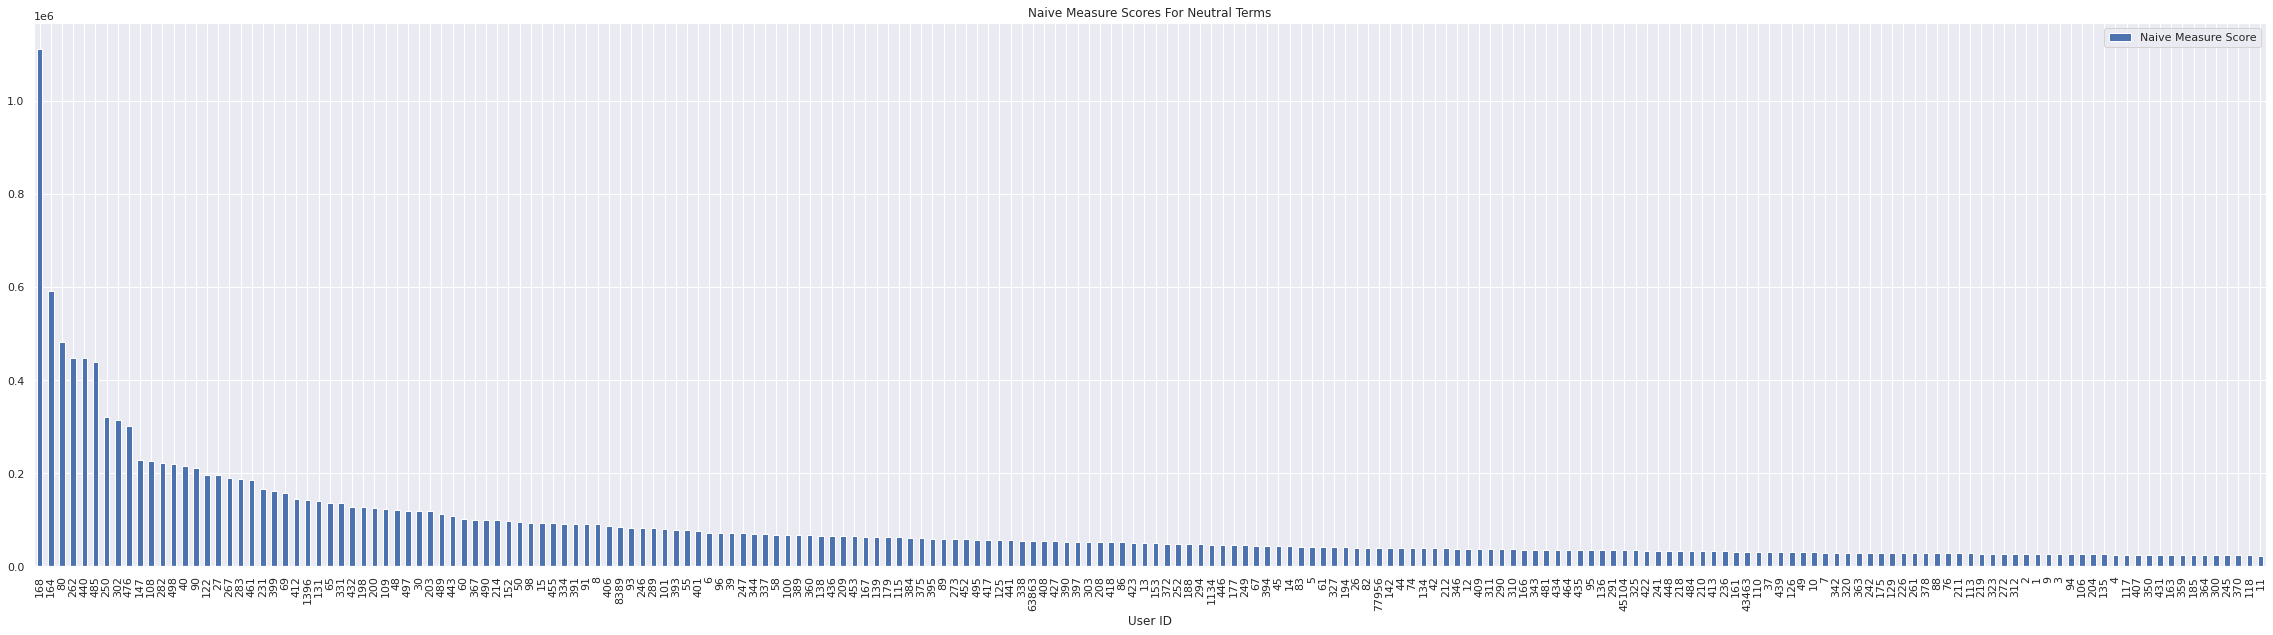

In [218]:
df_neutral_naive.plot(kind="bar", x='User ID', y='Naive Measure Score', figsize=(40, 10), title="Naive Measure Scores For Neutral Terms")


In [268]:
len(df_neutral_naive["User ID"])

200

In [271]:
len(df_other_naive["User ID"])

200

In [269]:
df_neutral_naive["Naive Measure Score"].mean()


84153.21

In [270]:
df_other_naive["Naive Measure Score"].mean()


8841.89

<AxesSubplot:title={'center':'Naive Measure Scores For Non-neutral Terms'}, xlabel='User ID'>

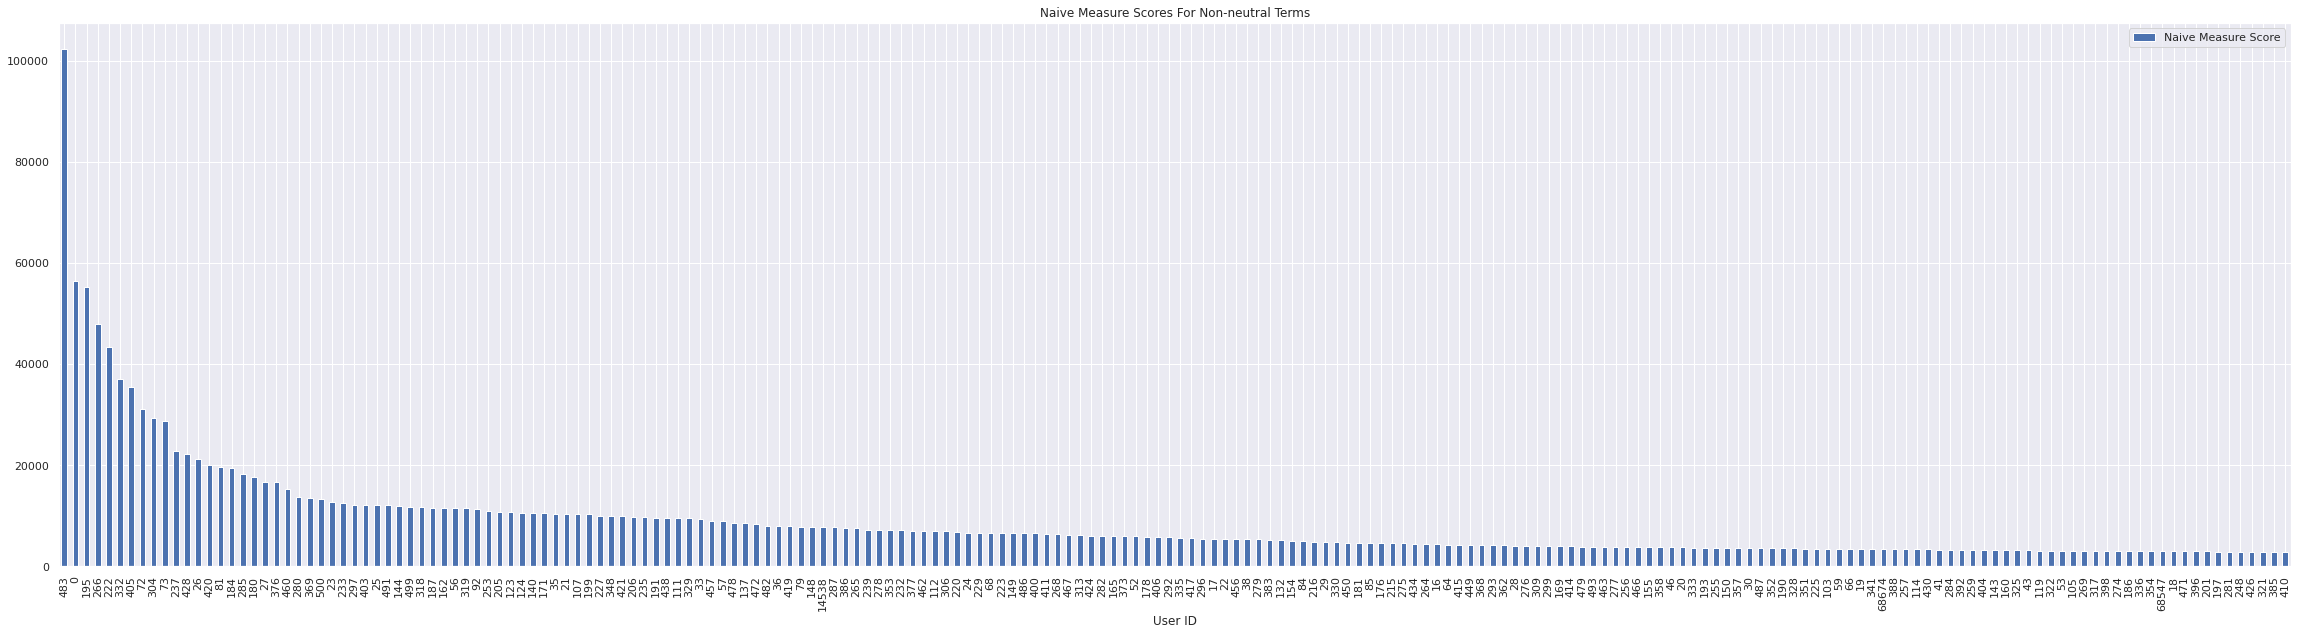

In [221]:
df_other_naive.plot(kind="bar", x='User ID', y='Naive Measure Score', figsize=(40, 10), title="Naive Measure Scores For Non-neutral Terms")


<AxesSubplot:title={'center':'Discourse Count For Neutral Terms'}, xlabel='User ID'>

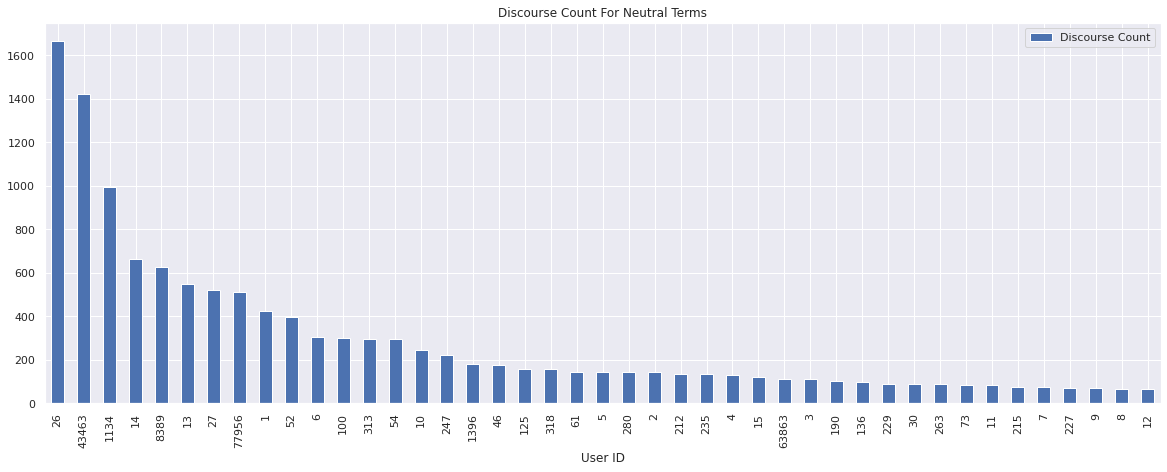

In [263]:
df_neutral_discourse.plot(kind="bar", x='User ID', y='Discourse Count', figsize=(20, 7), title="Discourse Count For Neutral Terms")


In [276]:
len(df_neutral_discourse["Discourse Count"])

43

In [272]:
df_neutral_discourse["Discourse Count"].mean()

290.6744186046512

In [274]:
len(df_other_discourse["Discourse Count"])

16

In [273]:
df_other_discourse["Discourse Count"].mean()

324.8125

<AxesSubplot:title={'center':'Discourse Count For Neutral Terms'}, xlabel='User ID'>

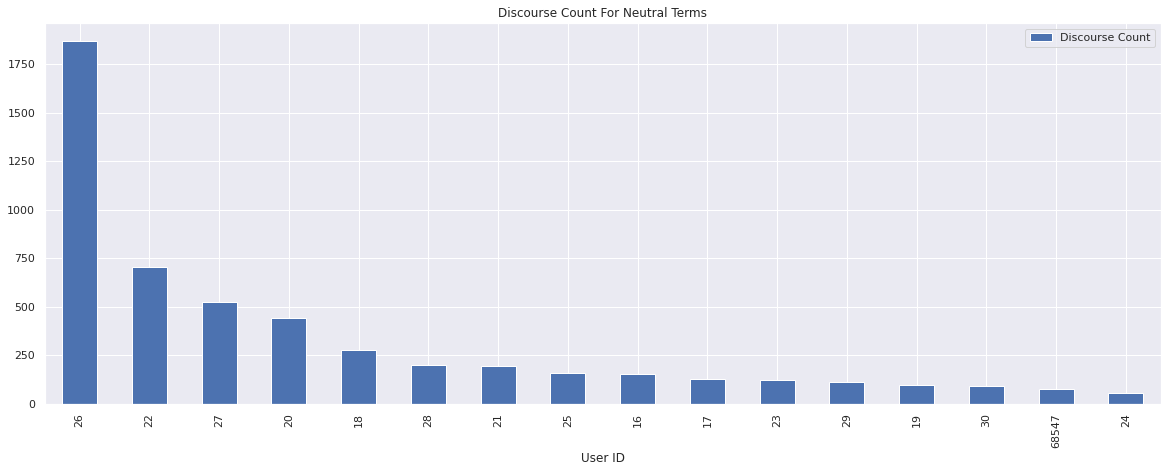

In [257]:
df_other_discourse.plot(kind="bar", x='User ID', y='Discourse Count', figsize=(20, 7), title="Discourse Count For Neutral Terms")


<AxesSubplot:title={'center':'RI Scores For Neutral Terms'}, xlabel='User ID'>

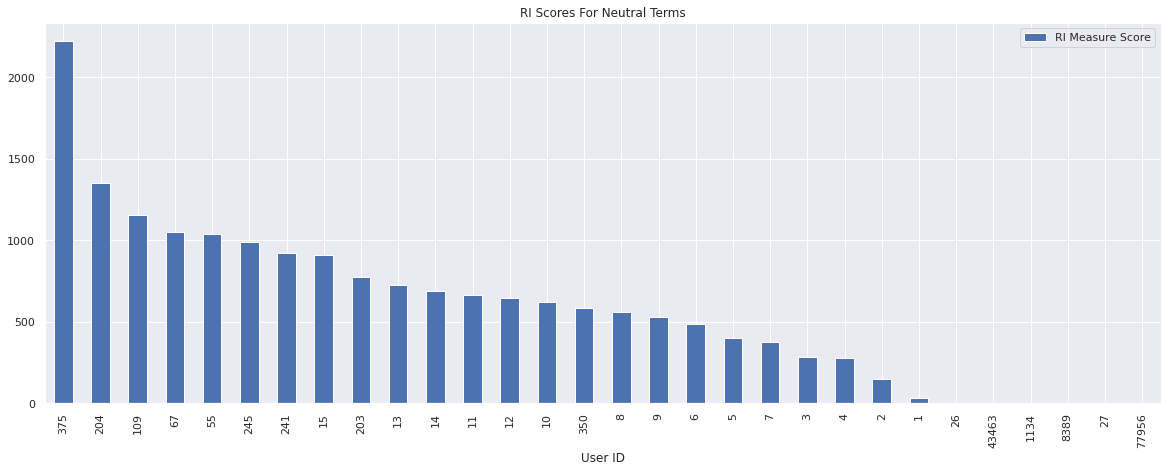

In [220]:
df_neutral_ri.plot(kind="bar", x='User ID', y='RI Measure Score', figsize=(20, 7), title="RI Scores For Neutral Terms")


In [278]:
len(df_neutral_ri["RI Measure Score"])

30

In [277]:
df_neutral_ri["RI Measure Score"].mean()


581.7064898830578

<AxesSubplot:title={'center':'RI Measure Scores For Non-neutral Terms'}, xlabel='User ID'>

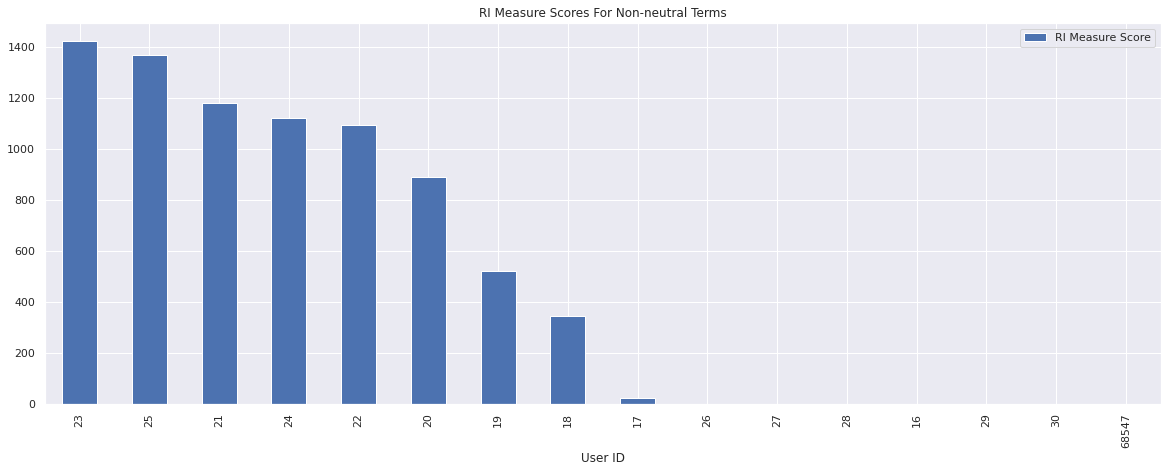

In [219]:
df_other_ri.plot(kind="bar", x='User ID', y='RI Measure Score', figsize=(20, 7), title="RI Measure Scores For Non-neutral Terms")


In [280]:
len(df_other_ri["RI Measure Score"])


16

In [279]:
df_other_ri["RI Measure Score"].mean()


497.04868962116626

<AxesSubplot:title={'center':'SNP Measure Scores For Neutral Terms'}, xlabel='User ID'>

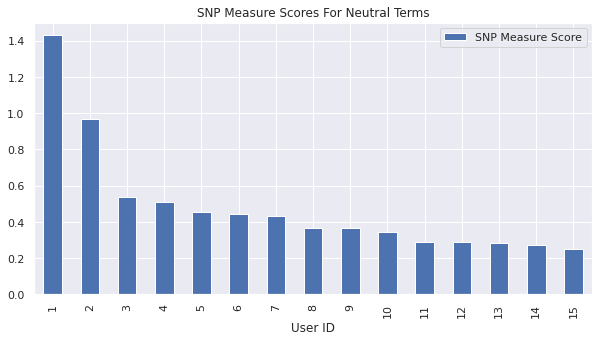

In [224]:
df_neutral_snp.plot.bar(x='User ID', y='SNP Measure Score', figsize=(10, 5), title="SNP Measure Scores For Neutral Terms")


In [281]:
df_neutral_snp["SNP Measure Score"].mean()


0.48211051884212214

<AxesSubplot:title={'center':'SNP Measure Scores For Non-neutral Terms'}, xlabel='User ID'>

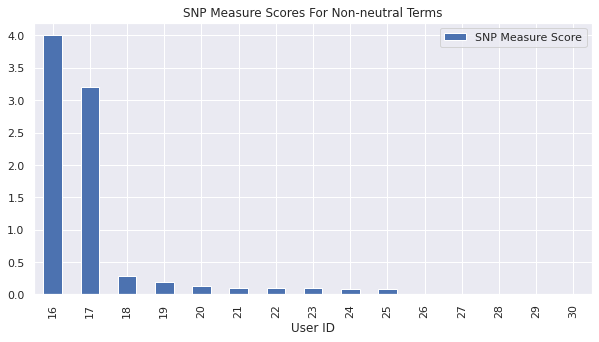

In [225]:
df_other_snp.plot.bar(x='User ID', y='SNP Measure Score', figsize=(10, 5), title="SNP Measure Scores For Non-neutral Terms")


In [282]:
df_other_snp["SNP Measure Score"].mean()


0.5521925519120578